<a href="https://colab.research.google.com/github/Sunnnyyy16/EmoSupportAI/blob/sunny/mental_visualization_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SupportlyChat의 visualization
* 사용자 인풋 시각화: 감정 piechart, 문장별 감정 점수 시각화
* huggingface transformer library, ntlk 활용

# text 준비

In [1]:
# input_text에 시각화 하고자하는 텍스트 입력

input_text =  """I've never been able to talk with my parents. My parents are in their sixties while I am a teenager.
I love both of them but not their personalities. I feel that they do not take me seriously whenever I talk about a serious event in my life.
If my dad doesn’t believe me, then my mom goes along with my dad and acts like she doesn’t believe me either.
I’m a pansexual, but I can’t trust my own parents.
 I've fought depression and won; however, stress and anxiety are killing me.
 I feel that my friends don't listen to me. I know they have their own problems, which I do my best to help with.
 But they don't always try to help me with mine, when I really need them.
 I feel as if my childhood has been taken from me. I feel as if I have no one whom I can trust."""

# Emotion 분류& 시각화: Piechart

In [2]:
from transformers import pipeline

# 28개 감정 라벨
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = [input_text]

model_outputs = classifier(sentences)
model_outputs[0]
# produces a list of dicts for each of the labels

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'sadness', 'score': 0.5752358436584473},
 {'label': 'disappointment', 'score': 0.3071487247943878},
 {'label': 'love', 'score': 0.10424572229385376},
 {'label': 'nervousness', 'score': 0.07968971878290176},
 {'label': 'annoyance', 'score': 0.045112282037734985},
 {'label': 'realization', 'score': 0.033153120428323746},
 {'label': 'neutral', 'score': 0.024750441312789917},
 {'label': 'fear', 'score': 0.024068182334303856},
 {'label': 'disapproval', 'score': 0.0233426783233881},
 {'label': 'approval', 'score': 0.021662147715687752},
 {'label': 'remorse', 'score': 0.01577470451593399},
 {'label': 'caring', 'score': 0.014789402484893799},
 {'label': 'anger', 'score': 0.013086158782243729},
 {'label': 'confusion', 'score': 0.011997805908322334},
 {'label': 'grief', 'score': 0.010055572725832462},
 {'label': 'embarrassment', 'score': 0.0076141152530908585},
 {'label': 'joy', 'score': 0.0070890141651034355},
 {'label': 'disgust', 'score': 0.006707461085170507},
 {'label': 'desire',

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 감정 점수 딕셔너리 생성
all_emotion_scores = {emotion['label']: emotion['score'] for emotion in model_outputs[0]}

# 상위 4개 emotion 선택
emotion_scores = dict(sorted(all_emotion_scores.items(), key=lambda item: item[1], reverse=True)[:4])

font_color = '#525252'
colors = ['#47B39C','#FFC154', '#EC6B56','#BE61CA'] #초록, 노랑, 빨강, 분홍
# colors = ['#ef476f','#ffd166','#06d6a0','#118ab2']
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
# colors = ['#ff595e','#ffca3a','#8ac926','#1982c4']
values = emotion_scores.values()
labels = emotion_scores.keys()
# title = 'Your Emotion Distribution' # borough

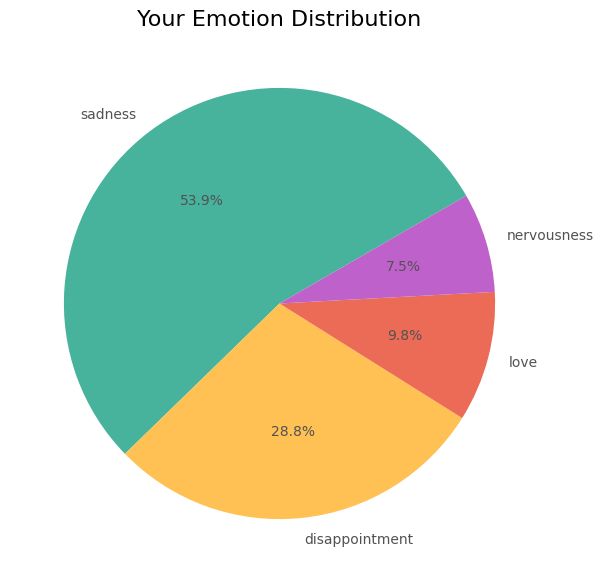

In [4]:
# Create subplots and a pie chart
# fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(values,
       labels=labels,
       colors=colors,
       startangle=30,
       autopct='%1.1f%%',
      #  wedgeprops=dict(width=.6),
      #  labeldistance=1.2,
      #  pctdistance=0.85,
       textprops={'color':font_color}
       )
# Set title, its position, and font size
title = plt.title('Your Emotion Distribution', fontsize=16)
title.set_position([.5, 1.02])
mpl.rcParams['font.size'] = 10.0

# 문장별 감정 점수 시각화

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Sentence 1:  I've never been able to talk with my parents. , sentiment score:  -0.9442591071128845
Sentence 2:  My parents are in their sixties while I am a teenager. , sentiment score:  -0.7462692260742188
Sentence 3:  I love both of them but not their personalities. , sentiment score:  -0.7400392889976501
Sentence 4:  I feel that they do not take me seriously whenever I talk about a serious event in my life. , sentiment score:  -0.9501364231109619
Sentence 5:  If my dad doesn’t believe me, then my mom goes along with my dad and acts like she doesn’t believe me either. , sentiment score:  -0.9107421040534973
Sentence 6:  I’m a pansexual, but I can’t trust my own parents. , sentiment score:  -0.978207528591156
Sentence 7:  I've fought depression and won; however, stress and anxiety are killing me. , sentiment score:  -0.9574991464614868
Sentence 8:  I feel that my friends don't listen to me. , sentiment score:  -0.9394986629486084
Sentence 9:  I know they have their own problems, which

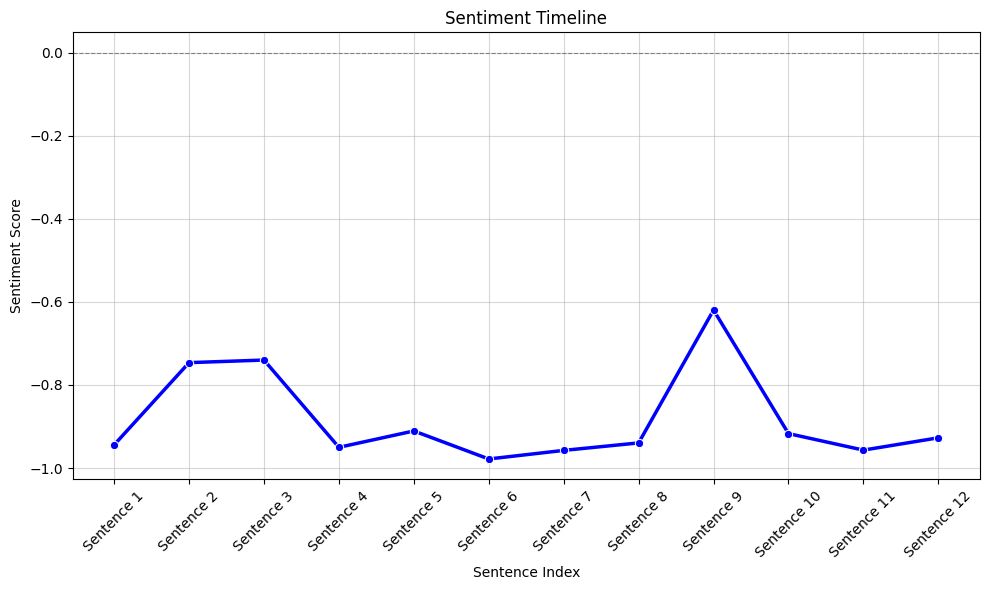

In [5]:
# 필요 라이브러리
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

# input_text 문장별로 나누기
sentences = sent_tokenize(input_text)

# 허깅페이스에서 bert기반 sentiment analysis pipeline 가져오기
sentiment_analyzer = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# 문장별로 sentiment score 계산, -1: 부정 1: 긍정
sentiment_scores = []
for i in range(len(sentences)):
  result = sentiment_analyzer(sentences[i])[0]
  score = result["score"] if result["label"] == "POSITIVE" else -result["score"]
  print(f"Sentence {i+1}: ", sentences[i], ", sentiment score: ", score)
  sentiment_scores.append(score)

# 문장을 x축, score y축으로 plot 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=range(len(sentences)),
    y=sentiment_scores,
    marker="o",
    color="blue",
    linewidth=2.5
)
plt.title("Sentiment Timeline")
plt.xlabel("Sentence Index")
plt.ylabel("Sentiment Score")
plt.xticks(range(len(sentences)), [f"Sentence {i+1}" for i in range(len(sentences))], rotation=45, fontsize=10)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()